# Calibration

In [16]:
from scipy import stats 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Epydemix import
import sys 
sys.path.append("../")
from epydemix.population import Population
from epydemix.epimodel import EpiModel, stochastic_simulation
from epydemix.plotting import plot_quantiles, plot_selected_quantiles, plot_posterior, plot_posterior_2d
from epydemix.calibration import calibration_top_perc

In [17]:
population = Population() 
population.load_population(population_name="Indonesia", path_to_data="../epydemix_data/")

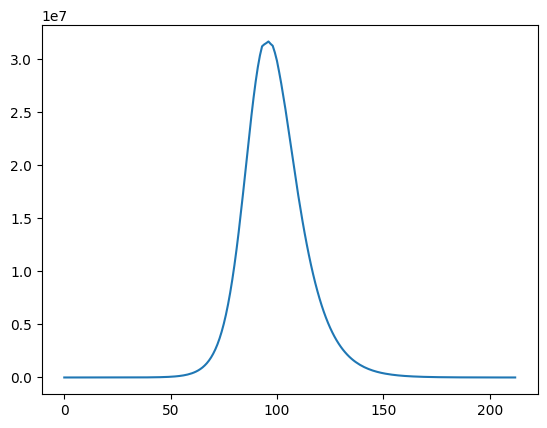

In [31]:
# first we generate "Fake" data for the calibration 
model = EpiModel(compartments=["S", "I", "R"])
model.add_parameters({"bet": 0.02, "mu": 0.2})
model.add_transition(source="S", target="I", rate_name="bet", agent="I")
model.add_transition(source="I", target="R", rate_name="mu")
results = model.simulate(population=population, 
                              start_date="2019-12-01", 
                              end_date="2020-07-01", 
                              S=population.Nk - np.ones(len(population.Nk)),
                              I=np.ones(len(population.Nk)),
                              R=np.zeros(len(population.Nk)),
                              steps=213)

df_quantiles = results.get_df_quantiles()
data = df_quantiles.loc[(df_quantiles["quantile"] == 0.5)]["I_total"].values

plt.plot(data)

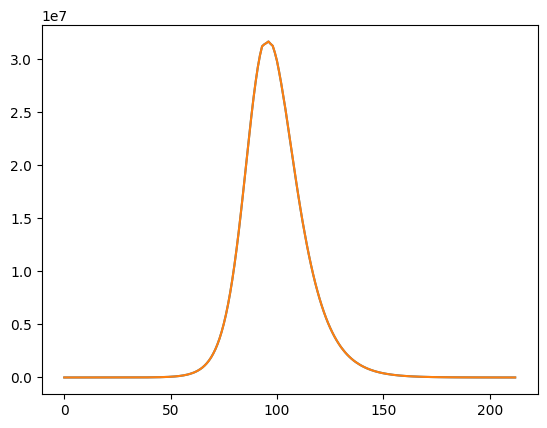

In [32]:
plt.plot(np.random.poisson(data))
plt.plot(data)

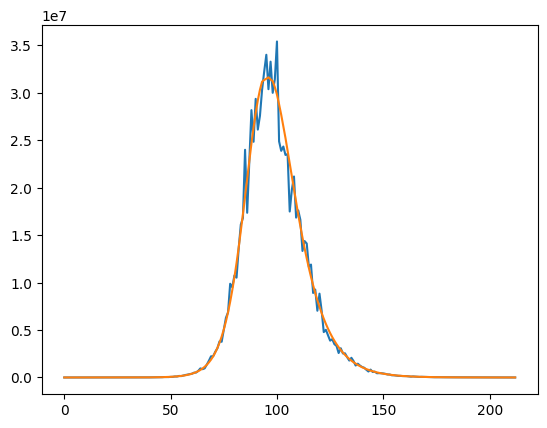

In [33]:
data
new_data = []
for d in data: 
    new_data.append(max([int(np.random.normal(d, d * 0.1)), 0]))

plt.plot(new_data)
plt.plot(data)

In [34]:
df_I = pd.DataFrame(data={"I": new_data,
                           "date": df_quantiles.loc[df_quantiles["quantile"]==0.5].date})
df_I

,I,date
639,14,2019-12-01 00:00:00.000000000
640,17,2019-12-02 00:06:47.547169811
641,20,2019-12-03 00:13:35.094339622
642,22,2019-12-04 00:20:22.641509434
643,22,2019-12-05 00:27:10.188679245
...,...,...
847,1158,2020-06-26 23:32:49.811320756
848,916,2020-06-27 23:39:37.358490568
849,1072,2020-06-28 23:46:24.905660380
850,749,2020-06-29 23:53:12.452830192


In [29]:
start_date="2019-12-01" 
end_date="2020-07-01" 

end_date, start_date = pd.to_datetime(end_date), pd.to_datetime(start_date)

In [30]:
end_date - start_date

Timedelta('213 days 00:00:00')

In [42]:
steps = 213
start_date, end_date = pd.to_datetime(start_date), pd.to_datetime(end_date)
simulation_dates = pd.date_range(start=start_date, end=end_date, periods=steps).tolist()
simulation_dates

[Timestamp('2019-12-01 00:00:00'),
 Timestamp('2019-12-02 00:06:47.547169811'),
 Timestamp('2019-12-03 00:13:35.094339622'),
 Timestamp('2019-12-04 00:20:22.641509434'),
 Timestamp('2019-12-05 00:27:10.188679245'),
 Timestamp('2019-12-06 00:33:57.735849056'),
 Timestamp('2019-12-07 00:40:45.283018868'),
 Timestamp('2019-12-08 00:47:32.830188679'),
 Timestamp('2019-12-09 00:54:20.377358490'),
 Timestamp('2019-12-10 01:01:07.924528302'),
 Timestamp('2019-12-11 01:07:55.471698113'),
 Timestamp('2019-12-12 01:14:43.018867924'),
 Timestamp('2019-12-13 01:21:30.566037736'),
 Timestamp('2019-12-14 01:28:18.113207547'),
 Timestamp('2019-12-15 01:35:05.660377358'),
 Timestamp('2019-12-16 01:41:53.207547170'),
 Timestamp('2019-12-17 01:48:40.754716981'),
 Timestamp('2019-12-18 01:55:28.301886792'),
 Timestamp('2019-12-19 02:02:15.849056604'),
 Timestamp('2019-12-20 02:09:03.396226415'),
 Timestamp('2019-12-21 02:15:50.943396226'),
 Timestamp('2019-12-22 02:22:38.490566038'),
 Timestamp('2019-12-